## Importamos las librerias necesarias

In [55]:
#Importamos pandas, numpy, re y las librerias para graficar

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

## Importamos el archivo para cargarlo en un dataframe

In [56]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df

file = 'C:/Users/Ramiro/Desktop/Digital House/Desafios/properatti.csv'

# Creamos un DataFrame con la info del csv
df = pd.read_csv(file)

## Vemos las caracteristicas principales del df

In [57]:
# Veamos la forma del df
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [58]:
#Veamos la info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

## Renombramos las columnas para trabajar más comodamente

Como el unico valor de la variable $Tipo Operacion$ es venta, podemos obviar ese columna. Al mismo tiempo, la variable de $expensas$ no nos aporta informacion relevante, por lo cual tambien decidimos eliminarla

In [59]:
#Primero arreglamos las irregularidades en las columnas
#Eliminamos las columnas que no aportan informacion descriptiva al df
df = df.drop(['Unnamed: 0','operation','expenses','floor','image_thumbnail', 'properati_url'], axis=1)



#Renombramos las columnas restantes 

df.rename(columns={ 'property_type': 'Tipo_Propiedad',
                    'place_name': 'Barrio',
                    'place_with_parent_names': 'Ubicacion_Completa',
                    'country_name': 'Pais',
                    'state_name': 'Provincia',
                    'geonames_id': 'GeoNames_ID',
                    'lat-lon': 'Latitud_Longitud',
                    'lat': 'Latitud',
                    'lon': 'Longitud',
                    'price': 'Precio',
                    'currency': 'Moneda',
                    'price_aprox_local_currency': 'Precio_ARS',
                    'price_aprox_usd': 'Precio_Dolares',
                    'surface_total_in_m2': 'Metros_Totales',
                    'surface_covered_in_m2': 'Metros_Cubiertos',
                    'price_usd_per_m2': 'Precio_m2_Dls',
                    'price_per_m2': 'Precio_m2',
                    'rooms': 'Cantidad_Ambientes',
                    'description': 'Descripcion',
                    'title': 'Titulo'}, inplace=True)

## Analicemos que tan completo se encuentra el dataset

In [60]:
# Creamos una lista con los valores nulos y no nulos para graficar

no_nulos = df.count().tolist()
nulos = [121220-x for x in no_nulos]

In [61]:
#Mostramos el porcentaje de nulos y no nulos en cada columna
trace1 = go.Bar(
    x=['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa',
       'Pais', 'Provincia', 'GeoNames_ID', 'Latitud_Longitud', 'Latitud',
       'Longitud', 'Precio', 'Moneda', 'Precio_ARS', 'Precio_Dolares',
       'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2',
       'Pisos', 'Cantidad_Ambientes', 'Descripcion', 'Titulo'],
    y=nulos,
    name='Valores Nulos',
    hoverinfo='text',
    text=[('%: ' + str((x/121200)*100)) for x, y in zip(nulos, no_nulos)]
)
trace2 = go.Bar(
    x=['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa',
       'Pais', 'Provincia', 'GeoNames_ID', 'Latitud_Longitud', 'Latitud',
       'Longitud', 'Precio', 'Moneda', 'Precio_ARS', 'Precio_Dolares',
       'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2',
       'Pisos', 'Cantidad_Ambientes', 'Descripcion', 'Titulo'],
    y= no_nulos,
    name='Valores No Nulos',
    hoverinfo='text',
    text=[('%: ' + str((y/121200)*100)) for x, y in zip(nulos, no_nulos)]   
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(title='Porcentaje de Nulos por Variable')
py.iplot(fig, filename='stacked-bar')

## Vemos que hay varias columnas con valores vacios

Notamos que casi el 20% de las observaciones no tienen precio.

Por otro lado, vemos que, tambien alrededor del 20% de las observaciones no cuentan con el campo Superficie Cubierta en m2 y casi un 35% no cuenta con el campo Superficie Total en m2.

En particular, nos va a interesar completar los campos de precio, cantidad de ambientes y superficie

## Con el metodo describe podemos ver algunos estadisticos de cada columna
Esto nos puede dar un insight de como completar los valores faltantes de las variables mas relevantes

In [62]:
df.describe()

,GeoNames_ID,Latitud,Longitud,Precio,Precio_ARS,Precio_Dolares,Metros_Totales,Metros_Cubiertos,Precio_m2_Dls,Precio_m2,Cantidad_Ambientes
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,47390.000000
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,3.080840
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,1.860773
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,2.000000
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,4.000000
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,32.000000


## Para empezar a limpiar el dataset vamos a evaluar las columnas

Si hay outliers, debemos definir si eliminarlos, nulearlos o algun otro metodo de correcion.
Por otro lado, vamos a intentar completar los valores faltantes, ya sea por medio de la descripcion u otro metodo (como una media condicional)

## Empecemos por analizar el campo Cantidad de Ambientes

Chequeemos que casos podriamos considerar como outliers

In [63]:
#Consideramos que los valores que se alejan 3 desvios estandar de la muestra, podrian representar outliers, errores de carga,etc
media = df['Cantidad_Ambientes'].mean()
desvio = df['Cantidad_Ambientes'].std()

len(df.loc[df['Cantidad_Ambientes']>(media +3*desvio),['Cantidad_Ambientes']])

712

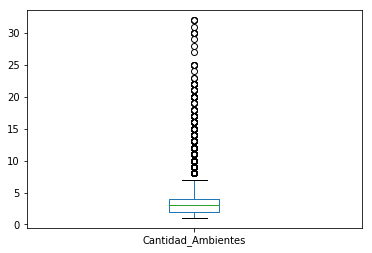

In [64]:
# Veamoslo graficamente
df['Cantidad_Ambientes'].plot(kind = 'box')
plt.show()

## Como vemos, muchos valores parecerian ser errores al momento de la carga.

Si bien prodriamos eliminar esos datos por considerarlos "outliers", algunos de ellos corresponden a complejos hoteleros, o venta de varias unidades en un mismo edificio.

Nos convendria crear una columna nueva indicando el tipo de propiedad (mas alla de casa/PH/dto)

Para completar los valores nulos, vamos a usar nuestra funcion para intentar obtenerlo de la variable Descripcion


## Como completamos los valores faltantes?

Una buena idea seria buscar si el dato que no figura en la columna correspondiente, podemos encontrarlo en la columna de Titulo o Descripcion

In [65]:
#Chequeamos la cantidad de nulos
df.Cantidad_Ambientes.isnull().value_counts()

True     73830
False    47390
Name: Cantidad_Ambientes, dtype: int64

In [66]:
#Veamos primero como figuran los datos en un caso en particular
df.Descripcion.sample(15)

24721     Excelente propiedad con  muy buena ubicación u...
59614     Corredor Responsable: Raul Hector Merlo - CMCP...
19890     Departamento a la venta en complejo Los Naranj...
40104     Corredor Responsable: Carlos Borra - CPCPI 490...
89072     Berenice IIEdificio de departamentos en constr...
69358     Manuel Ugarte 3200 | BelgranoModerno departame...
68621     AVISO LEGAL: Las descripciones arquitectónicas...
120394    Departamento 34m², Capital Federal, San Telmo,...
22520     Departamento monoambiente con cocina y baño co...
63462     CODIGO: 2558-352 ubicado en: RUTA NACIONAL 11 ...
48694     Corredor Responsable: Uno Bienes Raices SRL - ...
102891    Una Laguna de 3 hectáreas de agua cristalina q...
32221     Excelente casa en lote interno - Imepcable est...
22624     EXCELENTE CASA DESARROLLADA EN DOS PLANTASPB: ...
42168     Excelente departamento 3 ambientes al frente e...
Name: Descripcion, dtype: object

Vemos que hay una buena cantidad de informacion en la descripcion, por lo que vamos a definir una funcion para recorrer el texto y obtener un patron de texto deseado. Para que la funcion no arroje error, debemos asegurarnos que todas las observaciones sean del tipo string

In [67]:
df['Descripcion'] = df['Descripcion'].fillna('NaN')

Esta funcion nos va a servir para obtener la cantidad de ambientes y la superficie a partir de la descripción de la publicación. Para el precio u otra variable, vamos a tener que modificarla ligeramente

In [68]:
##FUNCION PARSER

#La funcion toma el primer grupo de captura y lo transforma a int, si no matchea, completa con un NaN

#Defino una funcion que a partir de un patron, parsee un campo del df

def parser(dataframe,columna, patron):
    lista = []
    largo = len(dataframe)
    serie = dataframe[columna]
    for x in range(largo):
        string = serie.loc[x]
        match = re.search(patron, string, flags = re.IGNORECASE)
        
        if match:
            lista.append(int(match.group(1))) 
        else:
            lista.append(np.NaN)
    return lista

Como vimos,en la mayoria de los casos, figura la cantidad de ambientes, seguido de un espacio, seguido de la palabra "Ambientes", "Habitaciones", "Dormitorios", etc. De esa manera podemos armar nuestro patron para la expresion regular-

In [69]:
# Parseamos la descripcion buscando el patron

patron = r'(\d+)(\s)(\b(ambientes|ambiente|amb|cuarto|cuartos|habitacion|habitaciones|dormitorio|dormitorios|dorm|hab)\b)'

df['Amb_Desc'] = parser(df,'Descripcion', patron)

## Chequeamos como quedó la nueva columna. 

In [70]:
df['Amb_Desc'].value_counts()

2.0        24878
3.0        22683
4.0         9570
1.0         8758
5.0         2365
6.0          624
7.0          242
8.0           55
9.0           37
10.0          27
11.0          18
0.0           17
23.0          13
160.0         11
20.0          10
9502.0         9
14.0           9
12.0           8
24.0           8
60.0           7
18.0           7
50.0           6
1500.0         5
13.0           5
70.0           4
75.0           4
600.0          4
21.0           4
140.0          3
27.0           3
           ...  
13562.0        1
20171.0        1
13303.0        1
281.0          1
691.0          1
173.0          1
42.0           1
693.0          1
822.0          1
113.0          1
6003.0         1
9152.0         1
85.0           1
312.0          1
71.0           1
442.0          1
23001.0        1
184.0          1
40.0           1
18472.0        1
241.0          1
13402.0        1
9311.0         1
172.0          1
37341.0        1
36.0           1
562.0          1
6731.0        

## Reemplazamos los valores que obtuvimos para completar los nulos de la columna Cantidad_Ambientes

Cabe destacar, que no vamos a pisar los valores extremos ya presentes en la columna original, ya que como mencionamos anteriormente, podria tratarse de desarrollos inmobiliarios, hoteles u otras propiedades similares

In [71]:
#Reemplazamos los valores vacios de la columna original con la extraccion de la descripcion.
#Asumimos que todos los valores mayores a 6 no corresponden al dato de queremos

df['Cantidad_Ambientes'] = df['Cantidad_Ambientes'].fillna(df['Amb_Desc'][df['Amb_Desc'] < 7])

In [72]:
#Chequeamos como quedo la columna original
df.Cantidad_Ambientes.isnull().value_counts()

False    86078
True     35142
Name: Cantidad_Ambientes, dtype: int64

## Propiedad especial?
Como vimos, hay ciertas palabras en la descipcion que podrian darnos a entender que la observación corresponde a una propiedad "especial".

Vamos a crear una columna nueva en donde marcaremos con un 1 o 0 si es una propiedad especial o no.

In [73]:
# Parseamos en la descripcion la RegEx que necesito, y le apendamos a una lista

patron = r'(\b(hotel|desarrollo inmobiliario|hostel|complejo)\b)'

propiedad =[]

for x in range(len(df)):
        string = df.Descripcion[x]
        match = re.search(patron, string, flags = re.IGNORECASE)
        if match:
            propiedad.append(1)
        else:
            propiedad.append(0)

In [74]:
df['Propiedad_Especial_dummy'] = propiedad

In [75]:
#Creamos la columna final solo con los casos que marcamos como Propiedad Especial y ademas tienen mas de 6 ambientes

df['Propiedad_Especial'] = df.loc[(df['Cantidad_Ambientes']>=7) & (df['Propiedad_Especial_dummy'] == 1),'Propiedad_Especial_dummy']

df['Propiedad_Especial'] = df['Propiedad_Especial'].fillna(0)

In [76]:
# Dropeamos la columna auxiliar

df = df.drop(['Propiedad_Especial_dummy'], axis = 1)

## Analicemos las columnas de Superficie (Metros_Cubiertos y Metros_Totales)

Empecemos viendo la distribucion de los valores y viendo si la columna contiene muchos outliers

In [77]:
#         La diferencia entre el valor y la media         mayor o igual a 3 desvios estandar
outliers_MetrosCub = df.loc[df['Metros_Cubiertos']-df['Metros_Cubiertos'].mean() >= (3*df['Metros_Cubiertos'].std()),'Metros_Cubiertos']

outliers_MetrosTot = df.loc[df['Metros_Totales']-df['Metros_Totales'].mean() >= (3*df['Metros_Totales'].std()),'Metros_Totales']

In [78]:
print(len(outliers_MetrosCub))

print(len(outliers_MetrosTot))

163
167


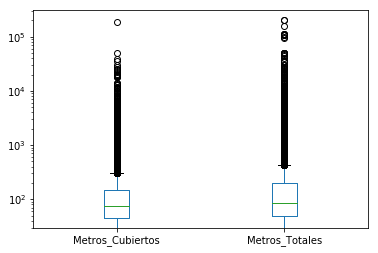

In [79]:
#Veamoslo graficamente
df[['Metros_Cubiertos','Metros_Totales']].plot(kind = 'box', logy = True)
plt.show()

## Vamos a completar esos casos con nulos, e intentar completarlos a traves de la descripcion

In [80]:
df.loc[np.abs(df['Metros_Cubiertos']-df['Metros_Cubiertos'].mean()) >= (3*df['Metros_Cubiertos'].std()),'Metros_Cubiertos'] = np.nan
df.loc[np.abs(df['Metros_Totales']-df['Metros_Totales'].mean()) >= (3*df['Metros_Totales'].std()),'Metros_Totales'] = np.nan

Por otro lado, chequeemos los casos en donde la superficie cubierta es mayor que la superficie total, esto podria darnos indicios de erorres de ingreso de datos

In [81]:
df.loc[df['Metros_Cubiertos']>df['Metros_Totales'],['Metros_Totales','Metros_Cubiertos']].sample(15)

,Metros_Totales,Metros_Cubiertos
54576,110.0,130.0
84426,273.0,664.0
97419,38.0,58.0
8730,39.0,70.0
45865,104.0,143.0
107149,42.0,73.0
28215,42.0,50.0
13455,300.0,900.0
40454,50.0,90.0
113886,70.0,74.0


Vamos a reemplazar los metros cubiertos por los metros totales

In [82]:
# Armamos un dataframe con los casos que necesitamos reemplazar
metros_df = df.loc[df['Metros_Cubiertos']>df['Metros_Totales'],['Metros_Totales']]

#Cambiamos el nombre de la columna para realizar el update
metros_df.columns = ['Metros_Cubiertos']

#Hacemos el update en los casos que necesitamos
df.update(metros_df)

In [83]:
#Chequeamos que el update haya funcionado como queriamos, volviendo a filtrar el df original
df.loc[df['Metros_Cubiertos']>df['Metros_Totales'],['Metros_Totales','Metros_Cubiertos']]

,Metros_Totales,Metros_Cubiertos


## De la misma manera que completamos la cantidad de ambientes, nos gustaria completar los casos en donde no contamos con el dato de la superficie

Si alguna de las dos columnas de superficie esta completa, vamos a completar la otra con ese valor

In [84]:
df.loc[(df['Metros_Cubiertos'].isnull())|(df['Metros_Totales'].isnull()), ['Metros_Cubiertos','Metros_Totales']].sample(10)

,Metros_Cubiertos,Metros_Totales
11553,NaN,135.0
109484,NaN,NaN
95276,173.0,NaN
115548,300.0,NaN
90863,NaN,NaN
14433,3.0,NaN
41112,NaN,NaN
8016,32.0,NaN
105647,NaN,100.0
18419,20.0,NaN


In [85]:
#Completamos ambas columnas
df['Metros_Cubiertos'] = df['Metros_Cubiertos'].fillna(df['Metros_Totales'])
df['Metros_Totales'] = df['Metros_Totales'].fillna(df['Metros_Cubiertos'])

De esta manera, los unicos casos faltantes son aquellos en los que ambos datos figuran vacios.

## Ahora buscamos los casos faltantes en la descripcion

En este caso puede ser un poco mas engorroso, ya que en la descripcion podemos encontrar strings del estilo "a 200 metros del subte", el cual nos arrojaria un falso positivo si seteamos nuestra RegEx para el siguiente grupo de captura:

r'(\d+)(\s)(\b(metros)\b)'

Por eso, usaremos la expresion regular 

r'(\d+)(\s)(\b(m2)\b)'

In [86]:
# Parseamos la descripcion buscando el patron

patron = r'(\d+)(\s?)(\b(m2)\b)'

df['Metros_Desc'] = parser(df,'Descripcion', patron)

In [87]:
# Completamos los casos donde el valor obtenido es menor a la media mas 3 desvios

df['Metros_Totales'] = df['Metros_Totales'].fillna(df.loc[df['Metros_Desc']<=(df['Metros_Totales'].mean() + 3*df['Metros_Totales'].std()),'Metros_Desc'])
df['Metros_Cubiertos'] = df['Metros_Cubiertos'].fillna(df.loc[df['Metros_Desc']<=(df['Metros_Cubiertos'].mean() + 3*df['Metros_Cubiertos'].std()),'Metros_Desc'])

In [88]:
# Vemos que logramos completar bastantes casos

print(df['Metros_Cubiertos'].isnull().value_counts())

print(df['Metros_Totales'].isnull().value_counts())

False    110015
True      11205
Name: Metros_Cubiertos, dtype: int64
False    110107
True      11113
Name: Metros_Totales, dtype: int64


## Analicemos ahora las columnas de precio de venta

Tenemos una columna con el precio en pesos, y otra en dolares. En base a esto, sabemos que en la descripcion el precio puede figurar en cualquiera de las dos monedas, o ambas.

Para eso vamos a definir dos RegEx distintas y generar dos columnas distintas

## Precio en Dolares

In [89]:
#Analizamos primero los candidatos a outliers

len(df.loc[df['Precio_Dolares']>=(df['Precio_Dolares'].mean() + 3*df['Precio_Dolares'].std()),'Precio_Dolares'])

1225

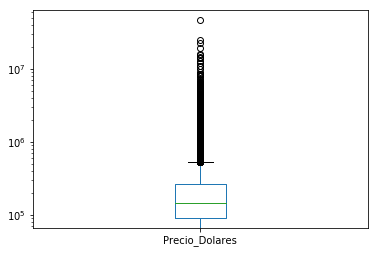

In [90]:
#Veamoslo graficamente
df['Precio_Dolares'].plot.box(logy=True)
plt.show()

In [91]:
# Los transformamos a NaN y vamos a tratar de completarlos con la descripcion
df.loc[df['Precio_Dolares']>=(df['Precio_Dolares'].mean() + 3*df['Precio_Dolares'].std()),'Precio_Dolares'] = np.nan

In [92]:
# Chequeamos la cantidad de valores nulos 
df['Precio_Dolares'].isnull().value_counts()

False    99585
True     21635
Name: Precio_Dolares, dtype: int64

In [93]:
## Precio en dolares. Esta RegEx encontrara los valores del estilo U$S XXX.XXX, hasta U$S 999.999

# Parseamos en la descripcion la RegEx que necesitamos

patron = r'(\bU\$S)(\s)(?P<miles>\d+)(\.)?(?P<unidades>\d*)'

p_dls = df.Descripcion.str.extract(patron, flags= re.IGNORECASE, expand = False)

In [94]:
#Transformamos las columnas a numeric

p_dls['miles'] = pd.to_numeric(p_dls['miles'], errors= 'coerce')
p_dls['unidades'] = pd.to_numeric(p_dls['unidades'], errors= 'coerce')

In [95]:
# Generamos la columna con el precio en dolares

p_dls['Precio'] = p_dls['miles']*1000 + p_dls['unidades']

In [96]:
# Completamos los valores nulos de la columna original

df['Precio_Dolares'] = df['Precio_Dolares'].fillna(p_dls['Precio'])

In [97]:
# Chequeamos cuantos completamos

df['Precio_Dolares'].isnull().value_counts()

False    99989
True     21231
Name: Precio_Dolares, dtype: int64

## Precio en pesos

In [98]:
#Analizamos primero los candidatos a outliers

len(df.loc[df['Precio_ARS']>=(df['Precio_ARS'].mean() + 3*df['Precio_ARS'].std()),'Precio_ARS'])

1225

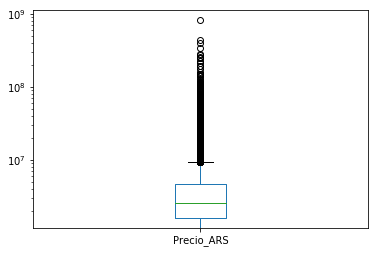

In [99]:
#Veamoslo graficamente
df['Precio_ARS'].plot.box(logy=True)
plt.show()

In [100]:
# Los transformamos a NaN y vamos a tratar de completarlos con la descripcion
df.loc[df['Precio_ARS']>=(df['Precio_ARS'].mean() + 3*df['Precio_ARS'].std()),'Precio_ARS'] = np.nan

In [101]:
# Chequeamos la cantidad de valores nulos 
df['Precio_ARS'].isnull().value_counts()

False    99585
True     21635
Name: Precio_ARS, dtype: int64

In [102]:
## Precio en Pesos. Esta RegEx encontrara los valores del estilo $ X.XXX.XXX o $ XXX.XXX

# Parseamos en la descripcion la RegEx que necesitamos

patron = r'(\$)(\s)?(?P<millones>\d*)(\.)?(?P<miles>\d{3})(\.)(?P<unidades>\d{3})'

p_ars = df.Descripcion.str.extract(patron, flags= re.IGNORECASE, expand = False)

In [103]:
# Chequeamos si extrajimos la informacion correctamente

p_ars.loc[~p_ars['miles'].isnull(),['millones','miles','unidades']].sample(10)

,millones,miles,unidades
7306,,261,379
89164,,420,000
101478,1,540,000
25696,,235,500
89076,,420,000
97462,2,000,000
120395,1,300,500
21182,1,200,000
115068,,750,000
27636,,260,000


In [104]:
#Transformamos las columnas a numeric

p_ars['millones'] = pd.to_numeric(p_ars['millones'], errors= 'coerce')
p_ars['miles'] = pd.to_numeric(p_ars['miles'], errors= 'coerce')
p_ars['unidades'] = pd.to_numeric(p_ars['unidades'], errors= 'coerce')

In [105]:
# Generamos la columna con el precio en pesos

p_ars['Precio'] = p_ars['millones']*1000000 +p_ars['miles']*1000 + p_ars['unidades']

In [106]:
# Completamos los valores nulos de la columna original

df['Precio_ARS'] = df['Precio_ARS'].fillna(p_ars['Precio'])

In [107]:
# Chequeamos cuantos completamos

df['Precio_ARS'].isnull().value_counts()

False    99652
True     21568
Name: Precio_ARS, dtype: int64

## Por otro lado, con las variables de Precio Total, Superficie y Precio por m2, si dos de ellas estan completas, podriamos completar la 3ra como una funcion de las otras.

In [108]:
# Limpiamos los outliers de las columnas de precio por metro cuadrado

df.loc[df['Precio_m2']>=(df['Precio_m2'].mean() + 3*df['Precio_m2'].std()),'Precio_m2'] = np.nan
df.loc[df['Precio_m2_Dls']>=(df['Precio_m2_Dls'].mean() + 3*df['Precio_m2_Dls'].std()),'Precio_m2_Dls'] = np.nan

Primero, vamos a buscar el valor del metro cuadrado promedio segun la zona de la propiedad, y utilizarlo para completar en los casos faltantes.

In [109]:
# Generamos la media condicionada al Barrio del Precio por metro cuadrado en pesos y dolares

m2_Barrio = df.groupby('Barrio')['Precio_m2'].mean()

m2_Dls_Barrio = df.groupby('Barrio')['Precio_m2_Dls'].mean()

## Veamos como se comparan los 5 "Barrios" mas caros contra los mas baratos

In [110]:
#Top 5 barrios mas caros
barrios_caros = list(m2_Barrio.nlargest(n=5, keep='first').index)
barrios_caros_values = list(m2_Barrio.nlargest(n=5, keep='first'))

barrios_baratos = list(m2_Barrio.nsmallest(n=5, keep='first').index)
barrios_baratos_values = list(m2_Barrio.nsmallest(n=5, keep='first'))

In [111]:
from plotly import tools

trace1 = go.Bar(
            x=barrios_caros,
            y=barrios_caros_values,
            name= 'Barrios Caros' 
)
trace2 = go.Bar(
            x=barrios_baratos,
            y=barrios_baratos_values,
            name= 'Barrios Baratos'
)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=300, width=900, title='Top 5 Precio m2')
py.iplot(fig, filename='top-m2')

## Notamos que hay una gran dispersion entre los 5 "Barrios" mas caros y los mas baratos por valor de m2

In [112]:
# Completamos los casos nulos con el mapeo del diccionario
df.loc[df['Precio_m2'].isnull(),'Precio_m2'] = df['Barrio'].map(m2_Barrio.to_dict())
df.loc[df['Precio_m2_Dls'].isnull(),'Precio_m2_Dls'] = df['Barrio'].map(m2_Dls_Barrio.to_dict())

## Ahora, los casos que aun figuran vacios vamos a completarlos

In [113]:
#Completamos Precio ARS cuando tenemos Precio x M2 y Superficie

preciom2 = df.loc[(df['Precio_ARS'].isnull())&(~df['Precio_m2'].isnull())&(~df['Metros_Totales'].isnull()) , ['Precio_m2']]
superficie = df.loc[(df['Precio_ARS'].isnull())&(~df['Precio_m2'].isnull())&(~df['Metros_Totales'].isnull()) , ['Metros_Totales']]

df.loc[df['Precio_ARS'].isnull(), 'Precio_ARS'] = preciom2*superficie

In [114]:
#Completamos Precio x M2 cuando tenemos Precio ARS y Superficie

precio = df.loc[~(df['Precio_ARS'].isnull())&(df['Precio_m2'].isnull())&(~df['Metros_Totales'].isnull()) , ['Precio_ARS']]
superficie = df.loc[~(df['Precio_ARS'].isnull())&(df['Precio_m2'].isnull())&(~df['Metros_Totales'].isnull()) , ['Metros_Totales']]

df.loc[df['Precio_m2'].isnull(), 'Precio_m2'] = precio/superficie

In [115]:
#Completamos Precio DLS cuando tenemos Precio x M2 Dls y Superficie

preciom2 = df.loc[(df['Precio_Dolares'].isnull())&(~df['Precio_m2_Dls'].isnull())&(~df['Metros_Totales'].isnull()) , ['Precio_m2_Dls']]
superficie = df.loc[(df['Precio_Dolares'].isnull())&(~df['Precio_m2_Dls'].isnull())&(~df['Metros_Totales'].isnull()) , ['Metros_Totales']]

df.loc[df['Precio_Dolares'].isnull(), 'Precio_Dolares'] = preciom2*superficie

In [116]:
#Completamos Precio x M2 Dls cuando tenemos Precio DLS y Superficie

precio = df.loc[~(df['Precio_Dolares'].isnull())&(df['Precio_m2_Dls'].isnull())&(~df['Metros_Totales'].isnull()) , ['Precio_Dolares']]
superficie = df.loc[~(df['Precio_Dolares'].isnull())&(df['Precio_m2_Dls'].isnull())&(~df['Metros_Totales'].isnull()) , ['Metros_Totales']]

df.loc[df['Precio_m2_Dls'].isnull(), 'Precio_m2_Dls'] = precio/superficie

In [117]:
#Completamos Superficie cuando tenemos Precio Total y Precio x M2 (Pesos)

preciom2 = df.loc[~(df['Precio_ARS'].isnull())&(~df['Precio_m2'].isnull())&(df['Metros_Totales'].isnull()) , ['Precio_m2']]
precio = df.loc[~(df['Precio_ARS'].isnull())&(df['Precio_m2'].isnull())&(df['Metros_Totales'].isnull()) , ['Precio_ARS']]


df.loc[df['Metros_Totales'].isnull(), 'Metros_Totales'] = precio/preciom2

In [118]:
#Completamos Superficie cuando tenemos Precio Total y Precio x M2 (Dolares)

preciom2 = df.loc[~(df['Precio_Dolares'].isnull())&(~df['Precio_m2_Dls'].isnull())&(df['Metros_Totales'].isnull()) , ['Precio_m2_Dls']]
precio = df.loc[~(df['Precio_Dolares'].isnull())&(df['Precio_m2_Dls'].isnull())&(df['Metros_Totales'].isnull()) , ['Precio_Dolares']]


df.loc[df['Metros_Totales'].isnull(), 'Metros_Totales'] = precio/preciom2

## Geolocalizacion

De la pagina http://www.geonames.org/ obtuvimos un dataset con los GeoName_ID de Argentina, los que vamos a utilizar para completar la informacion de Latitud y Longitud

In [119]:
# Cargamos el archivo en un nuevo df

geonames = pd.read_csv('C:/Users/Ramiro/Desktop/Digital House/Desafios/geonames.csv', sep=';')

In [120]:
#Vemos los casos que en el df original tienen un ID de GeoNames, pero tienen vacio los campos de Latitud y Longitud
df.loc[(~df['GeoNames_ID'].isnull())&(df['Latitud'].isnull()),['GeoNames_ID','Latitud','Longitud']].head()

,GeoNames_ID,Latitud,Longitud
13,3430234.0,NaN,NaN
14,3430234.0,NaN,NaN
42,3429979.0,NaN,NaN
49,3434130.0,NaN,NaN
62,3436042.0,NaN,NaN


In [121]:
#Creamos un diccionario para mapear la Latitud
latitud_dict = {}

#Creamos una tupla con los pares de key y value
geoname_lat = zip(geonames['Geonames_ID'],geonames['Latitud'])

#Rellenamos el diccionario
for geoname, latitud in geoname_lat:
    latitud_dict[geoname] = latitud

In [122]:
#Hacemos lo mismo para la Longitud
longitud_dict = {}

#Creamos una tupla con los pares de key y value
geoname_lon = zip(geonames['Geonames_ID'],geonames['Longitud'])

#Rellenamos el diccionario
for geoname, longitud in geoname_lon:
    longitud_dict[geoname] = longitud

In [123]:
#Mapeamos los valores del dataframe de GeoNames para completar
df.loc[df['Latitud'].isnull(),'Latitud'] = df['GeoNames_ID'].map(latitud_dict)
df.loc[df['Longitud'].isnull(),'Longitud'] = df['GeoNames_ID'].map(longitud_dict)

In [124]:
#Por ultimo completamos el campo Latitud_Longitud con la concatenacion de los otros dos

df.loc[(df['Latitud_Longitud'].isnull())&(~df['Latitud'].isnull()),'Latitud_Longitud'] = df['Latitud'].astype(str)+','+df['Longitud'].astype(str)

## Para terminar de limpiar el dataset, vamos a marcar los outliers de las columnas que limpiamos y vamos a eliminar las observaciones con nulos en variables relevantes

In [125]:
# No vamos a eliminar los candidatos a outlier de la variable Cantidad_Ambientes, ya que podrian representar propiedades especiales

#Superficie
df.loc[np.abs(df['Metros_Cubiertos']-df['Metros_Cubiertos'].mean()) >= (3*df['Metros_Cubiertos'].std()),'Metros_Cubiertos'] = np.nan
df.loc[np.abs(df['Metros_Totales']-df['Metros_Totales'].mean()) >= (3*df['Metros_Totales'].std()),'Metros_Totales'] = np.nan

#Precio Total
df.loc[np.abs(df['Precio_ARS']-df['Precio_ARS'].mean()) >= (3*df['Precio_ARS'].std()),'Precio_ARS'] = np.nan
df.loc[np.abs(df['Precio_Dolares']-df['Precio_Dolares'].mean()) >= (3*df['Precio_Dolares'].std()),'Precio_Dolares'] = np.nan

#Precio por m2
df.loc[np.abs(df['Precio_m2']-df['Precio_m2'].mean()) >= (3*df['Precio_m2'].std()),'Precio_m2'] = np.nan
df.loc[np.abs(df['Precio_m2_Dls']-df['Precio_m2_Dls'].mean()) >= (3*df['Precio_m2_Dls'].std()),'Precio_m2_Dls'] = np.nan


In [126]:
#Dropeamos todas las observaciones que tengan algun valor nulo en las columnas relevantes
columnas_a_chequear = ['Metros_Cubiertos','Metros_Totales', 'Precio_ARS', 'Precio_Dolares', 'Precio_m2', 'Precio_m2_Dls','Cantidad_Ambientes']

df = df.dropna(axis =0 , how = 'any', subset = columnas_a_chequear)

## Conclusiones
Para los graficos usamos informacion de la pagina:
https://python-para-impacientes.blogspot.com/2014/08/graficos-en-ipython.html

In [127]:
# Importamos librerias para graficar
import seaborn as sns

## Veamos como cambió la distribucion de valores nulos en el dataset


In [128]:
# Creamos una lista con los valores nulos y no nulos para graficar

no_nulos_limpio = df.count().tolist()
nulos_limpio = [len(df)-x for x in no_nulos_limpio]


#Mostramos el porcentaje de nulos y no nulos en cada columna
trace1 = go.Bar(
    x=['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa',
       'Pais', 'Provincia', 'GeoNames_ID', 'Latitud_Longitud', 'Latitud',
       'Longitud', 'Precio', 'Moneda', 'Precio_ARS', 'Precio_Dolares',
       'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2',
       'Cantidad_Ambientes', 'Descripcion', 'Titulo'],
    y=nulos_limpio,
    name='Valores Nulos - DS Limpio',
    hoverinfo='text',
    text=[('%: ' + str((x/len(df))*100)) for x, y in zip(nulos_limpio, no_nulos_limpio)]
)
trace2 = go.Bar(
    x=['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa',
       'Pais', 'Provincia', 'GeoNames_ID', 'Latitud_Longitud', 'Latitud',
       'Longitud', 'Precio', 'Moneda', 'Precio_ARS', 'Precio_Dolares',
       'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2',
       'Cantidad_Ambientes', 'Descripcion', 'Titulo'],
    y= no_nulos_limpio,
    name='Valores No Nulos - DS Limpio',
    hoverinfo='text',
    text=[('%: ' + str((y/len(df))*100)) for x, y in zip(nulos_limpio, no_nulos_limpio)]   
)
trace3 = go.Bar(
    x=['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa',
       'Pais', 'Provincia', 'GeoNames_ID', 'Latitud_Longitud', 'Latitud',
       'Longitud', 'Precio', 'Moneda', 'Precio_ARS', 'Precio_Dolares',
       'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2',
       'Cantidad_Ambientes', 'Descripcion', 'Titulo'],
    y=nulos,
    name='Valores Nulos',
    hoverinfo='text',
    text=[('%: ' + str((x/121200)*100)) for x, y in zip(nulos, no_nulos)]
)
trace4 = go.Bar(
    x=['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa',
       'Pais', 'Provincia', 'GeoNames_ID', 'Latitud_Longitud', 'Latitud',
       'Longitud', 'Precio', 'Moneda', 'Precio_ARS', 'Precio_Dolares',
       'Metros_Totales', 'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2',
       'Cantidad_Ambientes', 'Descripcion', 'Titulo'],
    y= no_nulos,
    name='Valores No Nulos',
    hoverinfo='text',
    text=[('%: ' + str((y/121200)*100)) for x, y in zip(nulos, no_nulos)]   
)

fig = tools.make_subplots(rows=2, cols=1, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)

fig['layout'].update(height=900, width=900, title='DataSet limpio vs DataSet original', barmode = 'stack')
py.iplot(fig, filename='nulos')

## Existe alguna correlacion entre las variables?

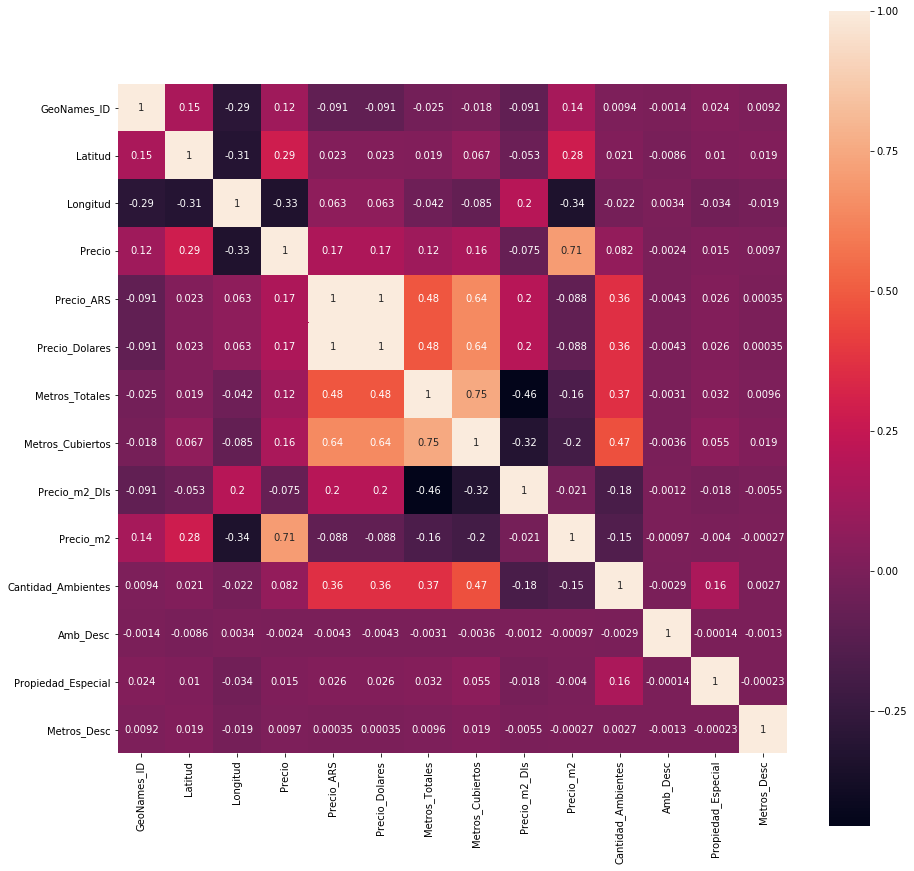

In [129]:
#Graficos la matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr() , square=True, annot=True, ax=ax);

## Que tipo de propiedad tiene el mayor precio por metro cuadrado en dolares?

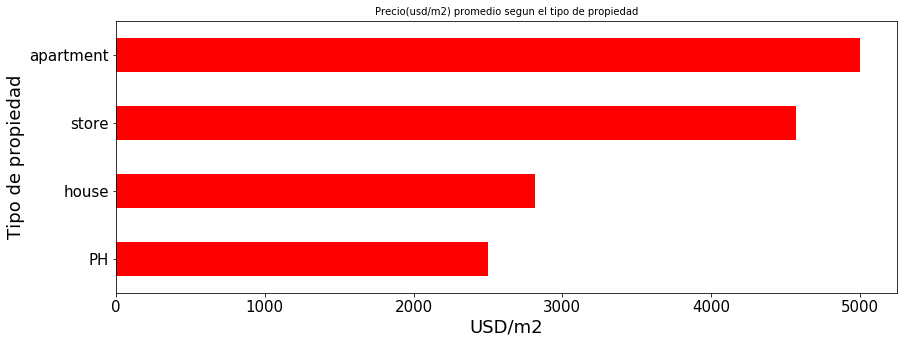

In [130]:
#Armamos los datos para el grafico
df_tipo_prop = df.groupby('Tipo_Propiedad').mean()['Precio_m2'].sort_values(ascending=False)[0:4]
graf = df_tipo_prop.sort_values().plot.barh(figsize=(14,5),fontsize=15, color='r')
graf.set_title("Precio(usd/m2) promedio segun el tipo de propiedad", fontsize=10)
graf.set_ylabel("Tipo de propiedad", fontsize=18)
graf.set_xlabel("USD/m2", fontsize=18)
plt.show()

## Top 5 "Provincias" precio promedio del metro2 en dolares

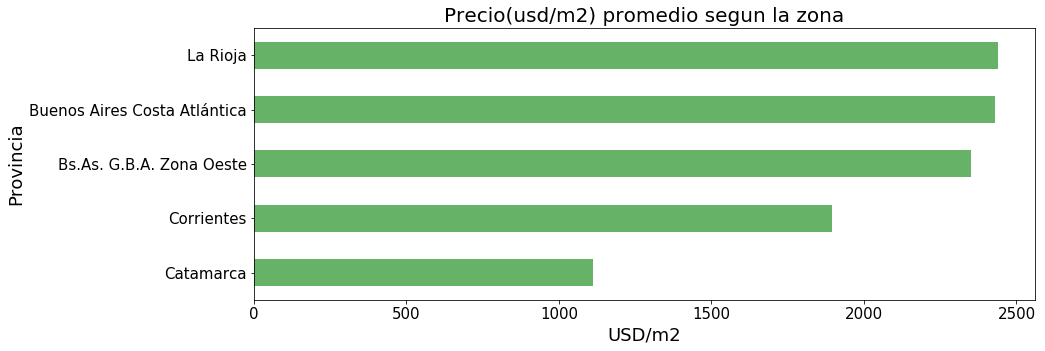

In [131]:
dfzone = df.groupby('Provincia').mean()['Precio_m2'].sort_values(ascending=True)[0:5]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='g',fontsize=15, alpha=0.6);
g.set_title("Precio(usd/m2) promedio segun la zona", fontsize=20)
g.set_ylabel("Provincia", fontsize=18)
g.set_xlabel("USD/m2", fontsize=18)
plt.show()

## Definimos dos funciones para graficar los tops de Barrios mas baratos y caros por zona

In [132]:
def ObtenerTop(df,agrupado, valor, cantidad, descendente):
    return df.groupby([agrupado])[valor].mean().sort_values(ascending=descendente).head(cantidad)
    
def ArmarPlot(df,agrupado, valor, cantidad, descendente,color,titulo):
    g = ObtenerTop(df,agrupado, valor, cantidad, descendente).sort_values().plot.barh(figsize=(15,5),color=color,fontsize=15)
    g.set_title(titulo, fontsize=20)
    g.set_ylabel(agrupado, fontsize=18)
    g.set_xlabel(valor, fontsize=18)
    plt.show()

In [133]:
CapitalFederal = df.loc[df.Ubicacion_Completa.str.contains("Capital Federal", na=False),:]
GBA =df.loc[df.Ubicacion_Completa.str.contains("G.B.A", na=False),:]
dfBaires = pd.concat([CapitalFederal,GBA])

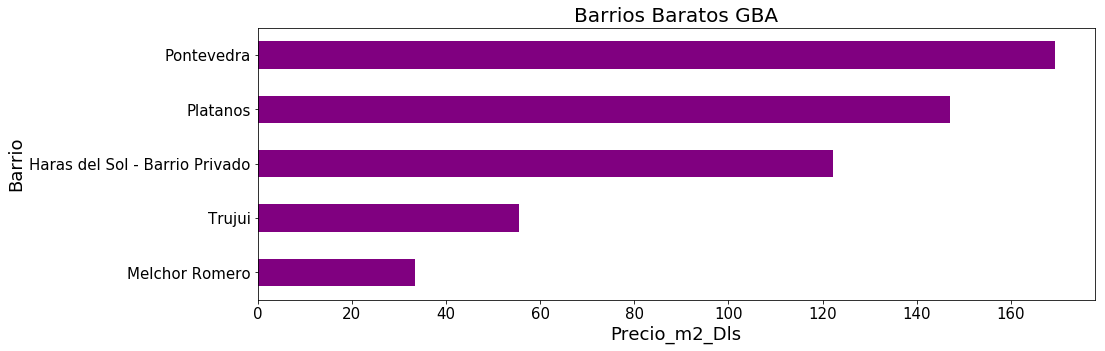

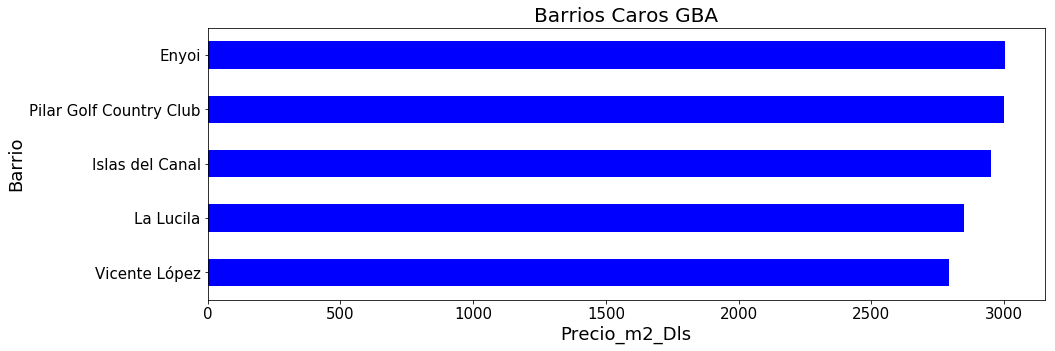

In [134]:
ArmarPlot(GBA,'Barrio', 'Precio_m2_Dls',5, True,'purple',"Barrios Baratos GBA")
ArmarPlot(GBA,'Barrio', 'Precio_m2_Dls',5, False,'blue',"Barrios Caros GBA")

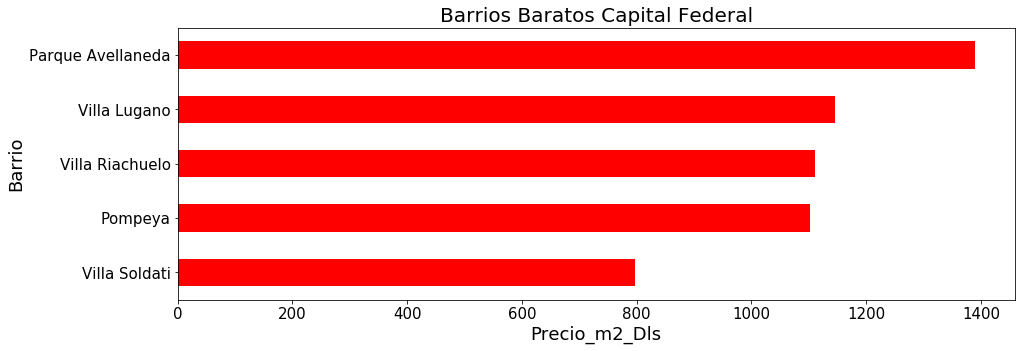

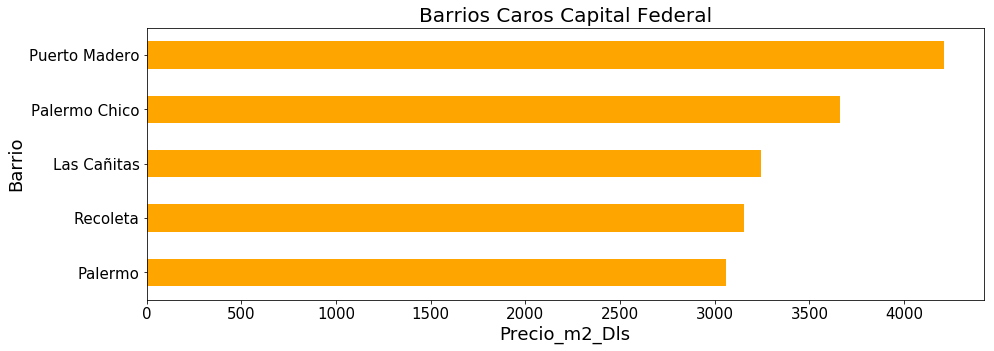

In [135]:
ArmarPlot(CapitalFederal,'Barrio', 'Precio_m2_Dls',5, True,'red',"Barrios Baratos Capital Federal")
ArmarPlot(CapitalFederal,'Barrio', 'Precio_m2_Dls',5, False,'orange',"Barrios Caros Capital Federal")